# ベータ乱数を受理・棄却法で生成
- 目標分布(ここではベータ分布)のpdfは既知とする
- 提案分布としての目標のベータ分布を覆うベータ分布を使用

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.stats import uniform, beta

In [3]:
np.random.seed()

## 目標分布f

In [4]:
f = beta(a=2.7, b=6.3).pdf

## 提案分布g

In [5]:
gv = beta(a=2.0, b=6.0)
g = gv.pdf

## 分布の上限を指定する定数Mを設定
- f(x)/g(x) <= Mを満たす必要がある
- f(x)/g(x)を最大化するxpotを求める

In [7]:
xopt = scipy.optimize.fmin(lambda x: -f(x)/g(x), 0.0, disp=False)
M = f(xopt) / g(xopt)
print("xopt = {}".format(xopt))
print("M = {}".format(M))

xopt = [ 0.7]
M = [ 1.67180777]


/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


## 受理・棄却法

In [8]:
Nsim = 100000

## 提案分布gからの乱数Yを生成

In [9]:
Y = gv.rvs(size=Nsim)

## 一様乱数UをNsim個生成

In [10]:
U = uniform.rvs(size=Nsim)

## Yから受理の条件を満たすサンプルXを残して残りを棄却

In [11]:
X = Y[U <= f(Y) / (M * g(Y))]
print("サンプル数: {} => {}".format(len(Y), len(X)))
print("実際の受理率: {}".format(len(X) / float(len(Y))))
print("理論的な受理率: {}".format(1.0 / M))

サンプル数: 100000 => 59755
実際の受理率: 0.59755
理論的な受理率: [ 0.59815489]


## 目標分布を描画

In [12]:
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

## 提案分布(ベータ分布)を描画

In [13]:
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

## 受理した乱数の分布を描画

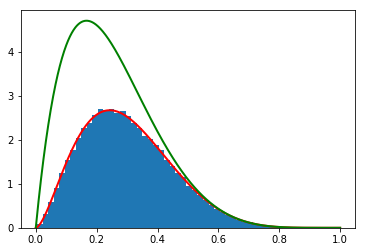

In [14]:
plt.hist(X, bins=50, normed=True)
plt.show()

# 受理されたサンプルと棄却されたサンプルを描く

In [15]:
f = beta(a=2.7, b=6.3).pdf
gv = beta(a=2.0, b=6.0)
g = gv.pdf
Nsim = 2000

In [16]:
Y = uniform.rvs(size=Nsim)
U = uniform.rvs(size=Nsim)

In [17]:
acceptedIdx = U <= f(Y) / (M * g(Y))
rejectedIdx = U > f(Y) / (M * g(Y))

In [19]:
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

In [20]:
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

In [21]:
plt.scatter(Y[acceptedIdx], U[acceptedIdx] * M * g(Y[acceptedIdx]), color='red')
plt.scatter(Y[rejectedIdx], U[rejectedIdx] * M * g(Y[rejectedIdx]), color='blue')

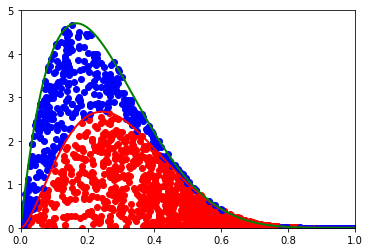

In [22]:
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 5.0))
plt.show()